# Lectura 38: LazyFrame - Miscelánea

## `map_batches`

Esta función permite aplicar una función personalizada a un LazyFrame. Es importante que la función personalizada devuelva un DataFrame de Polars.

In [1]:
import polars as pl
from polars import col

vuelos_lz = (
    pl.scan_parquet('./data/vuelos/vuelos.parquet')
)

In [2]:
(
    vuelos_lz.select(
        col('AIR_TIME'),
        col('DEPARTURE_DELAY')
    )
    .map_batches(lambda c: (c / 60).cast(pl.Int32))
    .collect()  
)   

AIR_TIME,DEPARTURE_DELAY
i32,i32
2,0
4,0
4,0
4,0
3,0
…,…
4,0
3,0
3,0


## `pipe`

Esta función ofrece una forma estructurada de aplicar una secuencia de funciones definidas por el usuario (UDF).

In [3]:
def fill_null_int_str(data, col_name):
    
    if str(data.select(col_name).dtypes[0]) == 'String':
        
        return data.fill_null('LOST')
    
    else:
        
        return data.fill_null(-999)

In [4]:
vuelos_lz.pipe(fill_null_int_str, 'CANCELLATION_REASON', ).collect()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,"""LOST""",null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,"""LOST""",null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,"""LOST""",null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,"""LOST""",null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,"""LOST""",null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,"""LOST""",null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,"""LOST""",null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,"""LOST""",null,null,null,null,null


In [5]:
vuelos_lz.pipe(fill_null_int_str, 'WEATHER_DELAY').collect()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,-999,-999,-999,-999,-999
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,-999,-999,-999,-999,-999
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,-999,-999,-999,-999,-999
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,-999,-999,-999,-999,-999


## `profile`

Esta función perfila un LazyFrame, es decir, ejecutará la consulta y devolverá una tupla que contiene el DataFrame materializado y un DataFrame que contiene información de perfil de cada nodo que se ejecuta. Las unidades de los tiempos son microsegundos.

Con el parámetro `show_plot=True` mostraremos un diagrama de Gantt del resultado del perfilado.

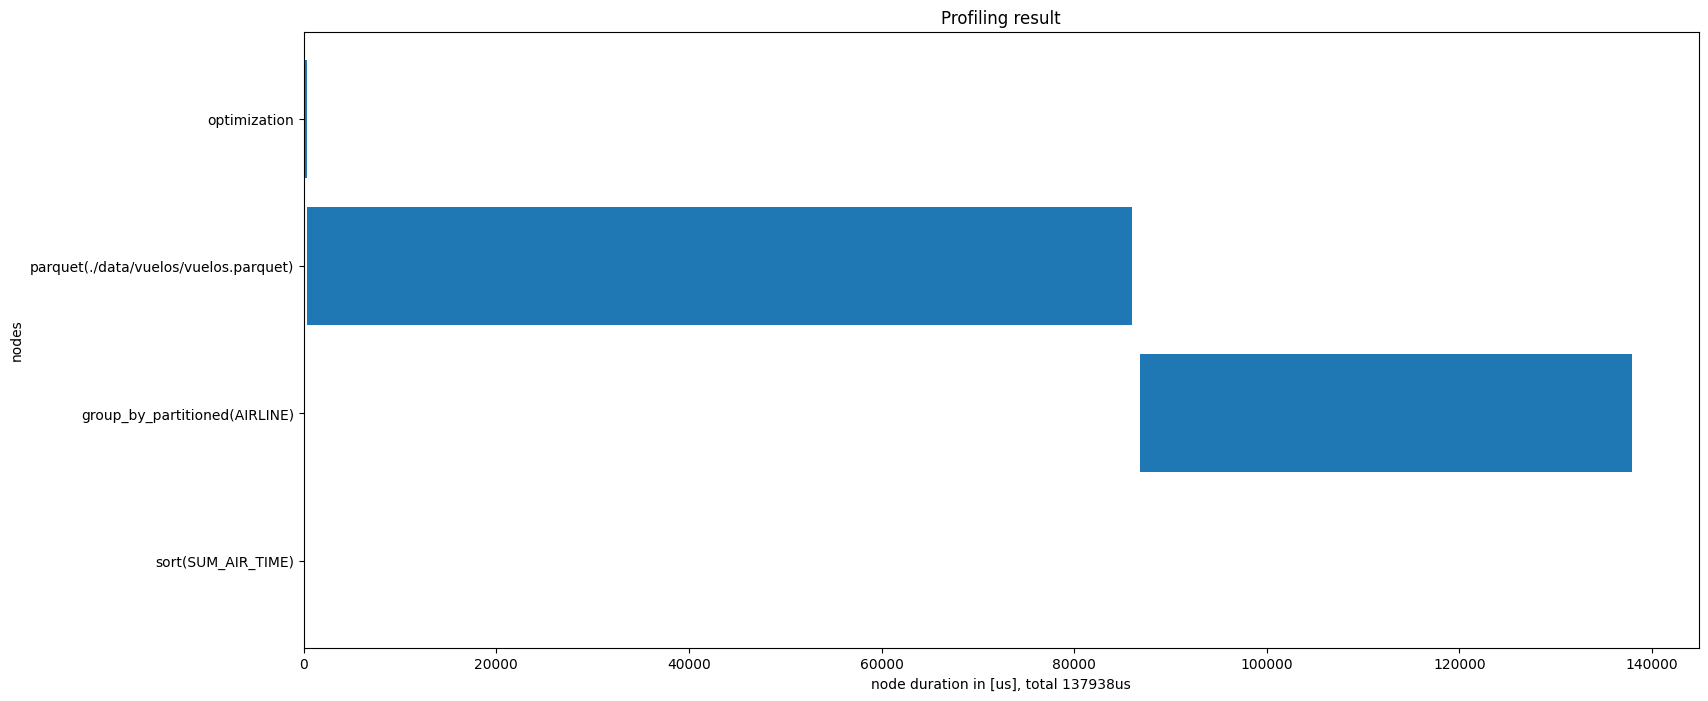

(shape: (14, 2)
 ┌─────────┬──────────────┐
 │ AIRLINE ┆ SUM_AIR_TIME │
 │ ---     ┆ ---          │
 │ str     ┆ i32          │
 ╞═════════╪══════════════╡
 │ WN      ┆ 128092352    │
 │ DL      ┆ 100660665    │
 │ AA      ┆ 99672739     │
 │ UA      ┆ 83697399     │
 │ OO      ┆ 43638869     │
 │ …       ┆ …            │
 │ MQ      ┆ 18673318     │
 │ NK      ┆ 15245550     │
 │ F9      ┆ 11733373     │
 │ VX      ┆ 11185771     │
 │ HA      ┆ 6454460      │
 └─────────┴──────────────┘,
 shape: (4, 3)
 ┌─────────────────────────────────┬────────┬────────┐
 │ node                            ┆ start  ┆ end    │
 │ ---                             ┆ ---    ┆ ---    │
 │ str                             ┆ u64    ┆ u64    │
 ╞═════════════════════════════════╪════════╪════════╡
 │ optimization                    ┆ 0      ┆ 379    │
 │ parquet(./data/vuelos/vuelos.p… ┆ 379    ┆ 86025  │
 │ group_by_partitioned(AIRLINE)   ┆ 86858  ┆ 137889 │
 │ sort(SUM_AIR_TIME)              ┆ 137894 ┆ 137938

In [6]:
query_pf = vuelos_lz.group_by('AIRLINE').agg(
    SUM_AIR_TIME=col('AIR_TIME').sum()
).sort('SUM_AIR_TIME', descending=True)

query_pf.profile(show_plot=True)

## `serialize y deserialize`

Estas funciones nos permitirán serializar y deserializar el plan lógico de un LazyFrame.

In [7]:
query_pf.serialize('./output.txt')

In [8]:
import io

# Abrimos el archivo en modo binario
with open("output.txt", "rb") as file_object:
    
    # Leemos el contenido del archivo entero como bytes
    data = file_object.read()

# Creamos un objeto de tipo BytesIO a partir de los datos binarios
query = io.BytesIO(data)

pl.LazyFrame.deserialize(query).collect()

AIRLINE,SUM_AIR_TIME
str,i32
"""WN""",128092352
"""DL""",100660665
"""AA""",99672739
"""UA""",83697399
"""OO""",43638869
…,…
"""MQ""",18673318
"""NK""",15245550
"""F9""",11733373
